In [8]:
import datetime
import utilix
import pytz
import logging
log = logging.getLogger()

In [5]:
run_col = utilix.rundb.xent_collection()


In [6]:
datetime.datetime.now(pytz.utc)

datetime.datetime(2021, 3, 9, 8, 33, 56, 916153, tzinfo=<UTC>)

In [8]:
dt = datetime.datetime.now(pytz.utc)
dt = datetime.datetime(dt.year, dt.month, dt.day)

In [40]:
import logging

In [41]:
getattr(logging, 'debug'.upper()),

(10,)

In [51]:
def get_runs(start, stop=None, detectors='tpc'):
    if stop is None:
        stop = start + datetime.timedelta(days=10000)
#     query = {{"$or":[{'end':{'$gt': start}}, {'end': None}]},
             
#              { "start" : {"$lt": stop}}}
    query = ({"$or":[ {"end": None}, {'end':{'$gt': start}}], 
             "start" : {"$lt": stop}})
    if detectors:
        query.update({'detectors': detectors})
    log.debug(f'Querying {query}')
    runs = [f"{r['number']:06}" for r in run_col.find(query,
                                                      projection={'number': 1})]
    runs.sort()
    log.debug(f'Found {runs} between {start} and {stop}')
    return runs

In [52]:
t = datetime.datetime.now(pytz.utc)-datetime.timedelta(seconds=7200)
get_runs(t)


['014061', '014064']

In [50]:
{"start" : {"$lt": 2}}

{'start': {'$lt': 2}}

In [31]:
run_col.find_one({'end':None})

{'_id': ObjectId('60002fa31260a3e9cfccb34c'),
 'number': 11794,
 'detectors': ['muon_veto'],
 'user': 'molinario',
 'mode': 'mv_test_selftrigger_1',
 'daq_config': {'_id': ObjectId('5ffd68846c1ffa6aa7b6a827'),
  'name': 'mv_test_selftrigger_1',
  'detector': 'muon_veto',
  'description': 'MV self trigger',
  'user': 'molinario',
  'includes': ['mv_boards_all',
   'mv_channel_map',
   'mv_registers_internal_trigger',
   'mv_thresholds_spe_2',
   'xenonnt_mv_strax_output',
   'xenonnt_master_host_config'],
  'V2718': {'muon_veto': {'pulser_freq': 0,
    'neutron_veto': 0,
    'muon_veto': 0,
    'led_trigger': 0,
    's_in': 1}},
  'baseline_fixed_value': 16000,
  'baseline_dac_mode': 'fixed',
  'run_start': 1,
  'processing_threads': {'reader5_reader_0': 4},
  'boards': [{'vme_address': '11110000',
    'crate': 0,
    'host': 'reader5_reader_0',
    'link': 1,
    'board': 870,
    'type': 'V1724_MV'},
   {'vme_address': '22220000',
    'crate': 1,
    'host': 'reader5_reader_0',
    'l

In [1]:
import matplotlib.pyplot as plt


(0.0, 1.0)

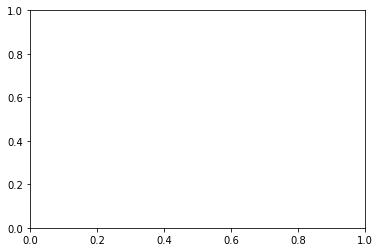

In [2]:
ax = plt.gca()
ax.get_ylim()

In [21]:
dt +  datetime.timedelta(days=10000)

datetime.datetime(2048, 7, 25, 0, 0)

In [28]:
[r['number'] for r in c.find({'start':{'$gt' : dt, "$lt": dt + datetime.timedelta(hours=3)},
                             'detectors' : 'tpc'
                             },
                            )]

[14049, 14048, 14047]

In [31]:
datetime.datetime.fromtimestamp(0)

datetime.datetime(1970, 1, 1, 1, 0)

In [34]:
datetime.timedelta(hours=3)

datetime.timedelta(seconds=10800)